In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sriramr/fruits-fresh-and-rotten-for-classification")

print("Path to dataset files:", path)

100%|██████████| 3.58G/3.58G [02:50<00:00, 22.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sriramr/fruits-fresh-and-rotten-for-classification/versions/1


In [2]:
import tensorflow as tf
print("GPU Available:", tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


GPU Available: True


In [3]:
import os
import zipfile
import random
import shutil
import numpy as np
from shutil import copyfile

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import tensorflow as tf
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
def make_dir(PATH):
  if not os.path.exists(PATH):
      os.mkdir(PATH)
      return PATH
  else:
    shutil.rmtree(PATH)
    os.mkdir(PATH)
    return PATH

In [5]:
try:
    base_dir = '/tmp'
    fruit_dir = make_dir(os.path.join(base_dir, 'fruit-dataset'))
    train_dir = make_dir(os.path.join(fruit_dir, 'train'))
    validation_dir = make_dir(os.path.join(fruit_dir, 'val'))
    test_dir = make_dir(os.path.join(fruit_dir, 'test'))
    preview_dir = make_dir(os.path.join(fruit_dir, 'preview'))

    train_fresh_dir = make_dir(os.path.join(train_dir, 'Fresh Fruit'))
    train_rotten_dir = make_dir(os.path.join(train_dir, 'Rotten Fruit'))

    validation_fresh_dir = make_dir(os.path.join(validation_dir, 'Fresh Fruit'))
    validation_rotten_dir = make_dir(os.path.join(validation_dir, 'Rotten Fruit'))

    test_fresh_dir = make_dir(os.path.join(test_dir, 'Fresh Fruit'))
    test_rotten_dir = make_dir(os.path.join(test_dir, 'Rotten Fruit'))

except OSError:
    pass

In [6]:
dataset_train_dir = '/root/.cache/kagglehub/datasets/sriramr/fruits-fresh-and-rotten-for-classification/versions/1/dataset/train'
dataset_test_dir = '/root/.cache/kagglehub/datasets/sriramr/fruits-fresh-and-rotten-for-classification/versions/1/dataset/test'

fapples_train_dir = os.path.join(dataset_train_dir, 'freshapples')
fbananas_train_dir = os.path.join(dataset_train_dir, 'freshbanana')
foranges_train_dir = os.path.join(dataset_train_dir, 'freshoranges')
rapples_train_dir = os.path.join(dataset_train_dir, 'rottenapples')
rbananas_train_dir = os.path.join(dataset_train_dir, 'rottenbanana')
roranges_train_dir = os.path.join(dataset_train_dir, 'rottenoranges')

fapples_test_dir = os.path.join(dataset_test_dir, 'freshapples')
fbananas_test_dir = os.path.join(dataset_test_dir, 'freshbanana')
foranges_test_dir = os.path.join(dataset_test_dir, 'freshoranges')
rapples_test_dir = os.path.join(dataset_test_dir, 'rottenapples')
rbananas_test_dir = os.path.join(dataset_test_dir, 'rottenbanana')
roranges_test_dir = os.path.join(dataset_test_dir, 'rottenoranges')

print('fapples_train images = ', len(os.listdir(fapples_train_dir)))
print('fbananas_train images = ', len(os.listdir(fbananas_train_dir)))
print('foranges_train images = ', len(os.listdir(foranges_train_dir)))
print('rapples_train images = ', len(os.listdir(rapples_train_dir)))
print('rbananas_train images = ', len(os.listdir(rbananas_train_dir)))
print('roranges_train images = ', len(os.listdir(roranges_train_dir)))
print()
print('fapples_test images = ', len(os.listdir(fapples_test_dir)))
print('fbananas_test images = ', len(os.listdir(fbananas_test_dir)))
print('foranges_test images = ', len(os.listdir(foranges_test_dir)))
print('rapples_test images = ', len(os.listdir(rapples_test_dir)))
print('rbananas_test images = ', len(os.listdir(rbananas_test_dir)))
print('roranges_test images = ', len(os.listdir(roranges_test_dir)))


fapples_train images =  1693
fbananas_train images =  1581
foranges_train images =  1466
rapples_train images =  2342
rbananas_train images =  2224
roranges_train images =  1595

fapples_test images =  395
fbananas_test images =  381
foranges_test images =  388
rapples_test images =  601
rbananas_test images =  530
roranges_test images =  403


In [7]:

from PIL import Image

def split_data(SOURCE='', TRAINING='', VALIDATION='', SPLIT_SIZE=0):
  data = os.listdir(SOURCE)
  random_data = random.sample(data, len(data))

  train_size = len(data)*SPLIT_SIZE

  for i, filename in enumerate(random_data):
    filepath = os.path.join(SOURCE, filename)
    if os.path.getsize(filepath) > 0:
      if i < train_size:
        copyfile(filepath, os.path.join(TRAINING, filename))
      else:
        copyfile(filepath, os.path.join(VALIDATION, filename))

In [8]:
SPLIT_SIZE = 0.67
split_data(fapples_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(fbananas_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(foranges_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(rapples_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(rbananas_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(roranges_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)

SPLIT_SIZE = 1.0
split_data(fapples_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(fbananas_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(foranges_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(rapples_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(rbananas_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(roranges_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)


print(len(os.listdir('/tmp/fruit-dataset/train/Fresh Fruit/')))
print(len(os.listdir('/tmp/fruit-dataset/train/Rotten Fruit/')))
print()
print(len(os.listdir('/tmp/fruit-dataset/val/Fresh Fruit/')))
print(len(os.listdir('/tmp/fruit-dataset/val/Rotten Fruit/')))
print()
print(len(os.listdir('/tmp/fruit-dataset/test/Fresh Fruit/')))
print(len(os.listdir('/tmp/fruit-dataset/test/Rotten Fruit/')))

3178
4130

1562
2031

1164
1534


In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=[0.5, 1.0],
    rotation_range=90,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

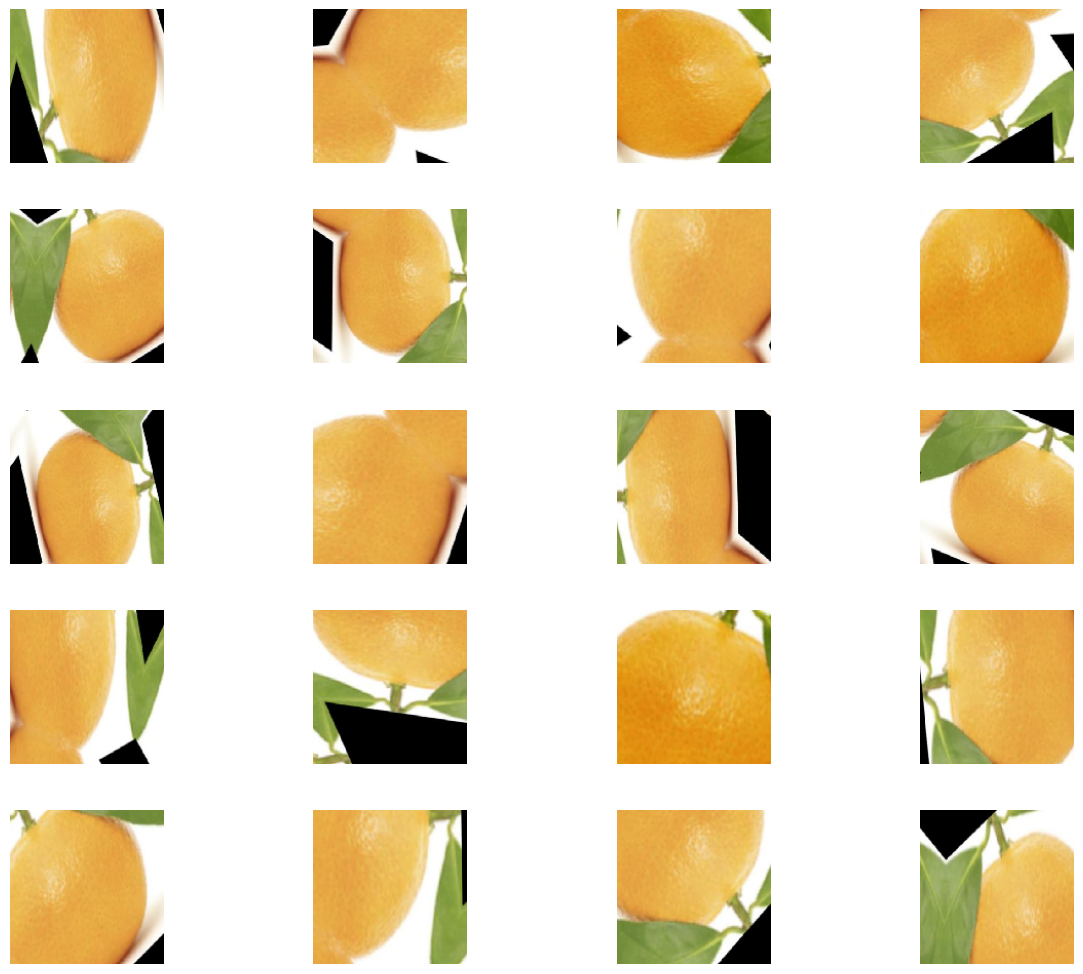

In [10]:
path_aug = os.path.join(train_fresh_dir, os.listdir(train_fresh_dir)[-1])
img_augmentation = image.load_img(path_aug)
x_aug = image.img_to_array(img_augmentation)
x_aug = x_aug.reshape((1,) + x_aug.shape)

i = 0
for batch in train_datagen.flow(x_aug, batch_size=1, save_to_dir=preview_dir, save_prefix='fruit', save_format='jpeg'):
    i += 1
    if i >= 20:
        break

preview_img = os.listdir(preview_dir)

plt.figure(figsize=(15, 15))
for n in range(len(preview_img)):
  plt.subplot((len(preview_img)//4)+1, 4, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(os.path.join(preview_dir, preview_img[n]),
                            color_mode="rgb",
                            target_size=(150, 150),
                            interpolation="nearest"))
  plt.axis('off')
plt.show()

for fn in preview_img:
  os.system(f'rm {os.path.join(preview_dir, fn)}')

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    color_mode="rgb",
    target_size=(150, 150),
    class_mode='binary'
)

validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                         batch_size=32,
                                                         color_mode="rgb",
                                                         target_size=(150,150),
                                                         class_mode='binary')

Found 7308 images belonging to 2 classes.
Found 3593 images belonging to 2 classes.


In [13]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from tensorflow.keras.applications import Xception, VGG16, InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
import pandas as pd

pre_trained_model = VGG16(input_shape=(150,150,3),
                          include_top=False)
for layer in pre_trained_model.layers:
    layer.trainable = False
x = layers.Flatten()(pre_trained_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)
model = Model(pre_trained_model.input, x)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in pre_trained_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


,Layer Type,Layer Name,Layer Trainable
0,"<InputLayer name=input_layer_1, built=True>",input_layer_1,False
1,"<Conv2D name=block1_conv1, built=True>",block1_conv1,False
2,"<Conv2D name=block1_conv2, built=True>",block1_conv2,False
3,"<MaxPooling2D name=block1_pool, built=True>",block1_pool,False
4,"<Conv2D name=block2_conv1, built=True>",block2_conv1,False
5,"<Conv2D name=block2_conv2, built=True>",block2_conv2,False
6,"<MaxPooling2D name=block2_pool, built=True>",block2_pool,False
7,"<Conv2D name=block3_conv1, built=True>",block3_conv1,False
8,"<Conv2D name=block3_conv2, built=True>",block3_conv2,False
9,"<Conv2D name=block3_conv3, built=True>",block3_conv3,False


In [20]:
from tensorflow.keras.applications import Xception, VGG16, InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
import pandas as pd
import math
from tensorflow.keras.optimizers import Adam

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    color_mode="rgb",
    target_size=(150, 150),
    class_mode='binary'
)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 98):
      print("\nReached 98% accuracy. Stop Training")
      self.model.stop_training = True

callbacks = myCallback()
pre_trained_model = VGG16(input_shape=(150,150,3),
                          include_top=False)

for layer in pre_trained_model.layers[:10]:
    layer.trainable = False

x = layers.Flatten()(pre_trained_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in pre_trained_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

train_len = 0
for foldername in os.listdir('/tmp/fruit-dataset/train'):
    train_len = train_len + len(os.listdir(os.path.join('/tmp/fruit-dataset/train',foldername)))

val_len = 0
for foldername in os.listdir('/tmp/fruit-dataset/val'):
    val_len = val_len + len(os.listdir(os.path.join('/tmp/fruit-dataset/val',foldername)))

print(train_len)
print(val_len)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size=32,
    color_mode="rgb",
    target_size=(150,150),
    class_mode='binary'
)

history = model.fit(
    train_generator,
    steps_per_epoch = math.ceil(train_len / 32),
    verbose=1,
    callbacks=[callbacks],
    validation_data=validation_generator,
    validation_steps = math.ceil(val_len / 32),
    epochs=10,

)

Found 7308 images belonging to 2 classes.
7308
3593
Found 3593 images belonging to 2 classes.
Epoch 1/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 101s 420ms/step - accuracy: 0.8383 - loss: 0.3617 - val_accuracy: 0.9641 - val_loss: 0.0962
Epoch 2/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 93s 405ms/step - accuracy: 0.9494 - loss: 0.1472 - val_accuracy: 0.9730 - val_loss: 0.0734
Epoch 3/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 93s 405ms/step - accuracy: 0.9687 - loss: 0.0888 - val_accuracy: 0.9844 - val_loss: 0.0422
Epoch 4/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 93s 405ms/step - accuracy: 0.9767 - loss: 0.0653 - val_accuracy: 0.9814 - val_loss: 0.0663
Epoch 5/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 93s 406ms/step - accuracy: 0.9763 - loss: 0.0674 - val_accuracy: 0.9908 - val_loss: 0.0257
Epoch 6/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 96s 419ms/step - accuracy: 0.9812 - loss: 0.0504 - val_accuracy: 0.9883 - val_loss: 0.0353
Epoch 7/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 139s 405ms/step - accuracy: 0.9831 - loss: 0.0488 - val_accuracy: 0.9697 - val_

<Figure size 640x480 with 0 Axes>

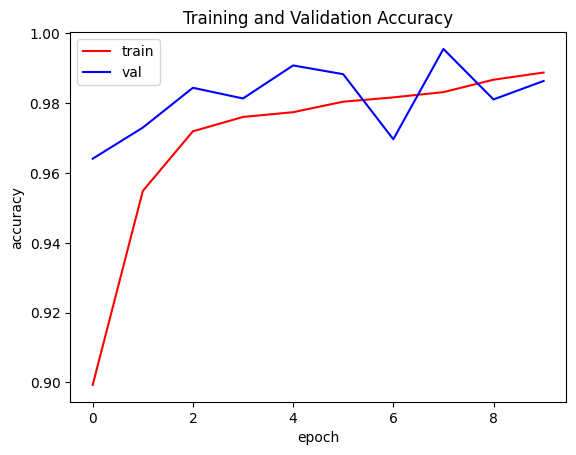

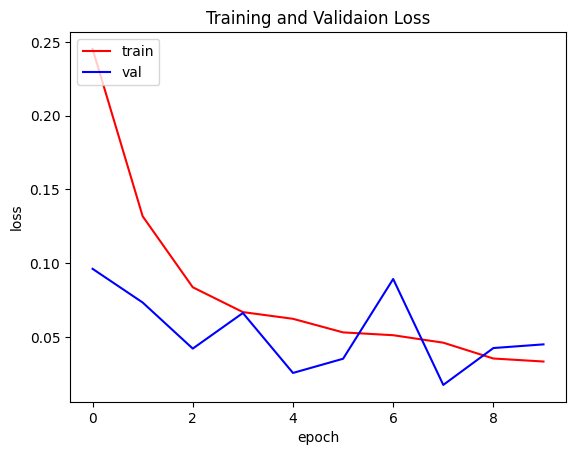

<Figure size 640x480 with 0 Axes>

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

In [22]:

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=1,
                                                  target_size=(150, 150),
                                                  shuffle = False,
                                                  class_mode='binary')

filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = model.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)
print('loss test: ',loss)

Found 2698 images belonging to 2 classes.
2698/2698 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.9692 - loss: 0.0736
accuracy test:  0.9814677834510803
loss test:  0.04641193524003029


In [23]:
model.save('model.h5')


Saving orange-fruit-isolated-on-white.webp to orange-fruit-isolated-on-white.webp
Saving rotten-and-moldy-orange.webp to rotten-and-moldy-orange.webp
Saving 5870ae2a25cdac7c580e9dcf1bbc92a1.webp to 5870ae2a25cdac7c580e9dcf1bbc92a1.webp
Saving rotten-banana.webp to rotten-banana.webp
Saving red-apple-with-droplet.webp to red-apple-with-droplet.webp
Saving rotten-apple.webp to rotten-apple.webp
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step
[0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[1]


<ipython-input-28-5712d901fb38>:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  title = f"predict: {predict_result[n]} ({round(float(image_conf[n])*100, 2)}%)"


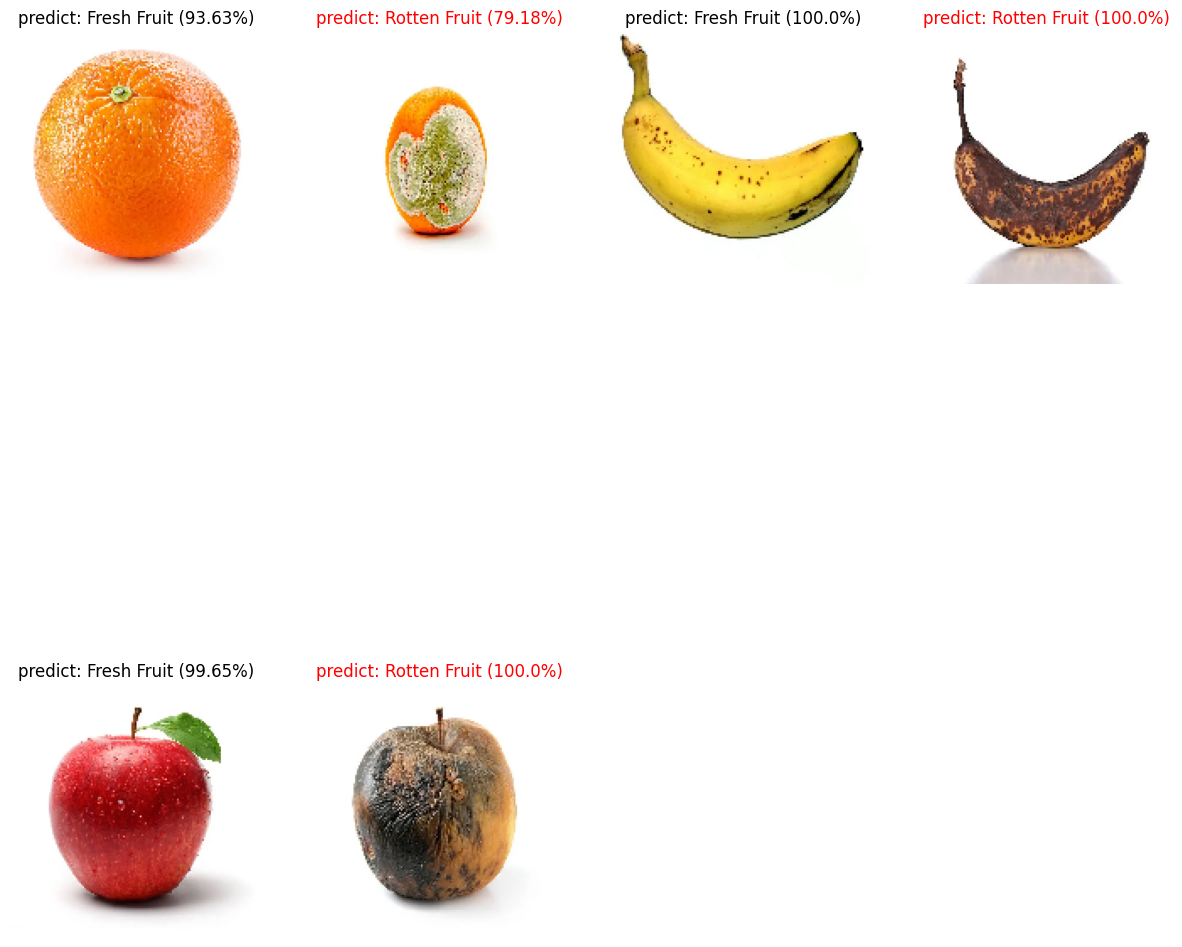

In [28]:
from keras.utils import get_file
import pathlib
import cv2

model_predict = tf.keras.models.load_model('model.h5')
model_predict.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

uploaded = files.upload()
image_name = []
image_conf = []
predict_result = []

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, color_mode="rgb", target_size=(150, 150), interpolation="nearest")
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img/255

  images = np.vstack([img])
  classes = model_predict.predict(images, batch_size=10)
  label = np.where(classes[0] > 0.5, 1,0)
  print(label)
  if label == 0:
    image_name.append(fn)
    image_conf.append(1.0 - classes[0])
    predict_result.append('Fresh Fruit')
  else:
    image_name.append(fn)
    image_conf.append(classes[0])
    predict_result.append('Rotten Fruit')

plt.figure(figsize=(15, 15))
for n in range(len(image_name)):
  plt.subplot((len(image_name)//4)+1, 4, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(image_name[n], color_mode="rgb", target_size=(150, 150), interpolation="nearest"))
  title = f"predict: {predict_result[n]} ({round(float(image_conf[n])*100, 2)}%)"
  if predict_result[n] == 'Fresh Fruit':
    plt.title(title, color='black')
  else:
    plt.title(title, color='red')

  plt.axis('off')
plt.show()

for fn in image_name:
  os.system(f'rm {fn}')

In [29]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history = model.fit(
    train_generator,
    steps_per_epoch=int(train_len/32),
    epochs=20,
    verbose=1,
    callbacks=[callbacks],
    validation_data=validation_generator,
    validation_steps=int(val_len/32)
)

Epoch 1/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 90s 372ms/step - accuracy: 0.6894 - loss: 0.6663 - val_accuracy: 0.8887 - val_loss: 0.2889
Epoch 2/20
  1/228 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.8750 - loss: 0.2794

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


228/228 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - accuracy: 0.8750 - loss: 0.2794 - val_accuracy: 0.8906 - val_loss: 0.2840
Epoch 3/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 81s 354ms/step - accuracy: 0.8687 - loss: 0.2965 - val_accuracy: 0.9132 - val_loss: 0.2019
Epoch 4/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - accuracy: 0.8750 - loss: 0.2865 - val_accuracy: 0.9163 - val_loss: 0.2060
Epoch 5/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 82s 361ms/step - accuracy: 0.8938 - loss: 0.2401 - val_accuracy: 0.8945 - val_loss: 0.2562
Epoch 6/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9062 - loss: 0.1942 - val_accuracy: 0.8929 - val_loss: 0.2636
Epoch 7/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 81s 355ms/step - accuracy: 0.9068 - loss: 0.2256 - val_accuracy: 0.8948 - val_loss: 0.2370
Epoch 8/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - accuracy: 0.8750 - loss: 0.2180 - val_accuracy: 0.8970 - val_loss: 0.2247
Epoch 9/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 79s 348ms/step - accuracy: 0.9136 - loss: 0.2140 - val_acc

<Figure size 640x480 with 0 Axes>

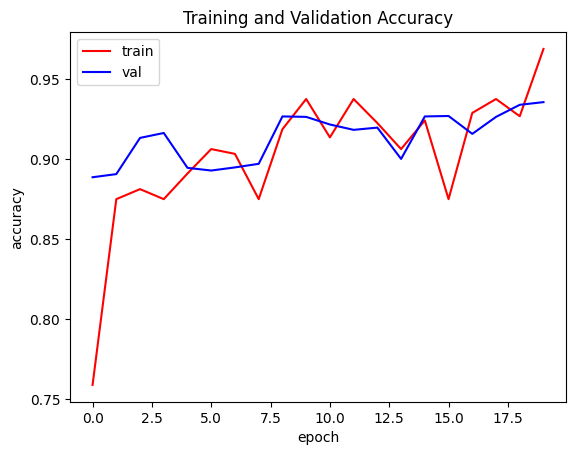

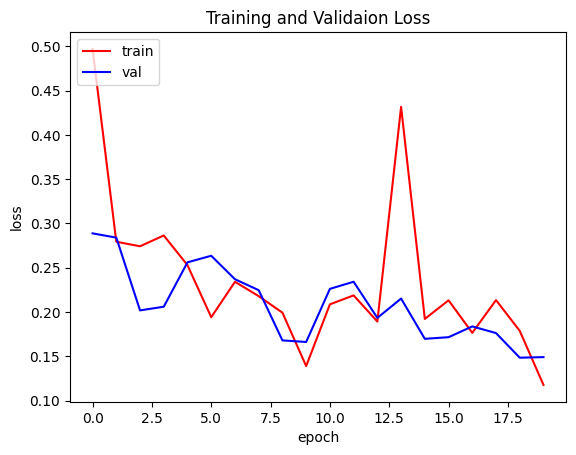

<Figure size 640x480 with 0 Axes>

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

In [32]:
loss, acc = model.evaluate(test_generator, steps=nb_samples, verbose=1)
print('Accuracy on test set:', acc)

2698/2698 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9503 - loss: 0.1324
Accuracy on test set: 0.9488509893417358


In [33]:
model.save('model_CNN.h5')


In [47]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers
from tensorflow.keras import Model
import pandas as pd
from tensorflow.keras.optimizers import Adam


pre_trained_model = ResNet50(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
for layer in pre_trained_model.layers:
    layer.trainable = False
x = layers.Flatten()(pre_trained_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model3 = Model(pre_trained_model.input, x)
model3.compile(optimizer=Adam(learning_rate=0.0001),  # Adjust learning rate
               loss='binary_crossentropy',
               metrics=['accuracy'])
model3.summary()
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in pre_trained_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])



Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 150, 150, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 156, 156, 3)    │              0 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 75, 75, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 75, 75, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 75, 75, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 77, 77, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 38, 38, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 38, 38, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 38, 38, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 38, 38, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 38, 38, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 38, 38, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 38, 38, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 38, 38, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 38, 38, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 76,018,561 (289.99 MB)

 Trainable params: 52,430,849 (200.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

,Layer Type,Layer Name,Layer Trainable
0,"<InputLayer name=input_layer_9, built=True>",input_layer_9,False
1,"<ZeroPadding2D name=conv1_pad, built=True>",conv1_pad,False
2,"<Conv2D name=conv1_conv, built=True>",conv1_conv,False
3,"<BatchNormalization name=conv1_bn, built=True>",conv1_bn,False
4,"<Activation name=conv1_relu, built=True>",conv1_relu,False
...,...,...,...
170,"<Activation name=conv5_block3_2_relu, built=True>",conv5_block3_2_relu,False
171,"<Conv2D name=conv5_block3_3_conv, built=True>",conv5_block3_3_conv,False
172,"<BatchNormalization name=conv5_block3_3_bn, built=True>",conv5_block3_3_bn,False
173,"<Add name=conv5_block3_add, built=True>",conv5_block3_add,False


In [48]:
history = model3.fit(
    train_generator,
    steps_per_epoch=int(train_len/32),
    epochs=15,  # Adjust as needed
    verbose=1,
    callbacks=[callbacks],
    validation_data=validation_generator,
    validation_steps=int(val_len/32)
)

Epoch 1/15
228/228 ━━━━━━━━━━━━━━━━━━━━ 104s 408ms/step - accuracy: 0.5580 - loss: 0.7708 - val_accuracy: 0.6903 - val_loss: 0.6007
Epoch 2/15
  1/228 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - accuracy: 0.6875 - loss: 0.5735

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


228/228 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - accuracy: 0.6875 - loss: 0.5735 - val_accuracy: 0.6590 - val_loss: 0.6152
Epoch 3/15
228/228 ━━━━━━━━━━━━━━━━━━━━ 86s 376ms/step - accuracy: 0.6254 - loss: 0.6454 - val_accuracy: 0.6987 - val_loss: 0.5944
Epoch 4/15
228/228 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - accuracy: 0.7188 - loss: 0.6299 - val_accuracy: 0.6735 - val_loss: 0.6040
Epoch 5/15
228/228 ━━━━━━━━━━━━━━━━━━━━ 142s 624ms/step - accuracy: 0.6587 - loss: 0.6121 - val_accuracy: 0.6417 - val_loss: 0.6188
Epoch 6/15
228/228 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - accuracy: 0.6875 - loss: 0.6035 - val_accuracy: 0.6643 - val_loss: 0.6091
Epoch 7/15
228/228 ━━━━━━━━━━━━━━━━━━━━ 142s 427ms/step - accuracy: 0.6463 - loss: 0.6229 - val_accuracy: 0.6733 - val_loss: 0.6053
Epoch 8/15
228/228 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - accuracy: 0.6250 - loss: 0.6120 - val_accuracy: 0.6579 - val_loss: 0.6133
Epoch 9/15
228/228 ━━━━━━━━━━━━━━━━━━━━ 142s 624ms/step - accuracy: 0.6576 - loss: 0.6127 - val_

<Figure size 640x480 with 0 Axes>

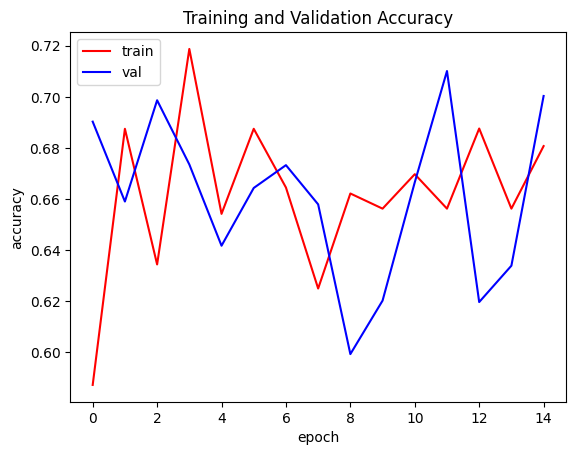

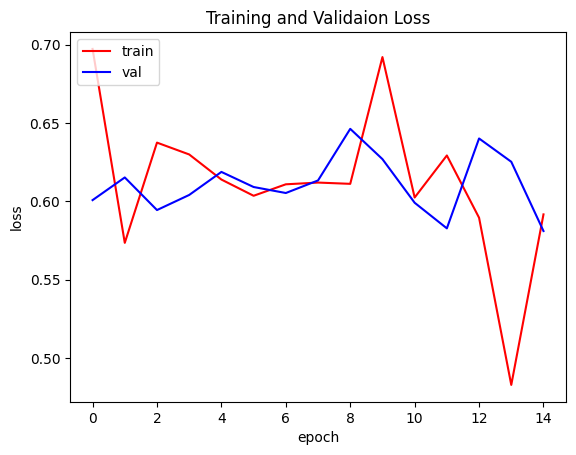

<Figure size 640x480 with 0 Axes>

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

In [50]:
loss, acc = model3.evaluate(test_generator, steps=nb_samples, verbose=1)
print('Accuracy on test set:', acc)

2698/2698 ━━━━━━━━━━━━━━━━━━━━ 32s 11ms/step - accuracy: 0.5720 - loss: 0.7313
Accuracy on test set: 0.7090437412261963


In [51]:
model3.save('model_resNet.h5')

In [52]:
import tensorflow as tf

# Load the models from their .h5 files
model_vgg16 = tf.keras.models.load_model('/content/model.h5')  # Replace with your VGG16 .h5 file name
model_cnn_scratch = tf.keras.models.load_model('/content/model_CNN.h5')  # Replace with your CNN .h5 file name
model_resNet=tf.keras.models.load_model('/content/model_resNet.h5')
# Evaluate each model on the test set
loss_vgg16, acc_vgg16 = model_vgg16.evaluate(test_generator, steps=nb_samples, verbose=1)
loss_cnn_scratch, acc_cnn_scratch = model_cnn_scratch.evaluate(test_generator, steps=nb_samples, verbose=1)
loss_resnet,acc_resnet=model_resNet.evaluate(test_generator, steps=nb_samples, verbose=1)
# Print the results
print('VGG16 - Accuracy:', acc_vgg16, 'Loss:', loss_vgg16)
print('CNN from scratch - Accuracy:', acc_cnn_scratch, 'Loss:', loss_cnn_scratch)
print("Resnet - Accuracy",acc_resnet,'Loss:',loss_resnet)

# You can then use these accuracy and loss values to create a bar chart or table for comparison.

2698/2698 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.9692 - loss: 0.0736
2698/2698 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9503 - loss: 0.1324
2698/2698 ━━━━━━━━━━━━━━━━━━━━ 35s 11ms/step - accuracy: 0.5720 - loss: 0.7313
VGG16 - Accuracy: 0.9814677834510803 Loss: 0.04641193524003029
CNN from scratch - Accuracy: 0.9488509893417358 Loss: 0.13599860668182373
Resnet - Accuracy 0.7090437412261963 Loss: 0.5838202238082886


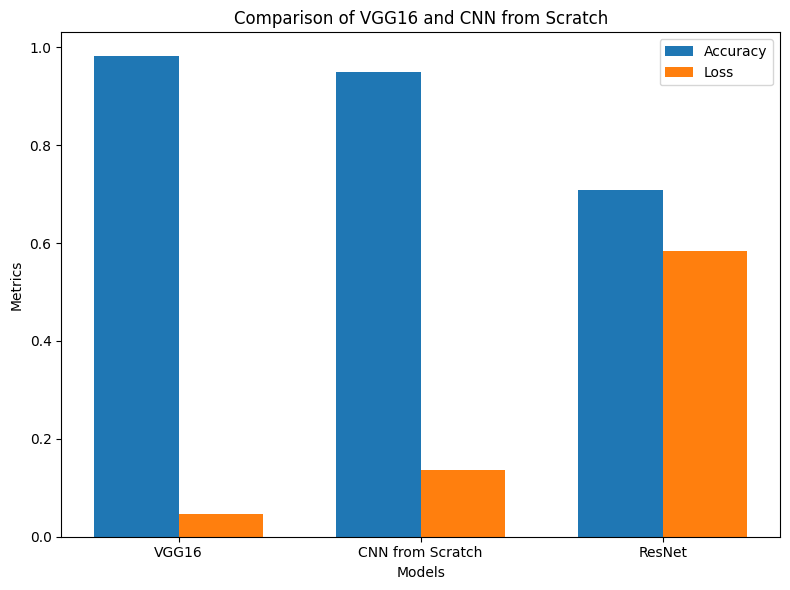

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and metrics
model_names = ['VGG16', 'CNN from Scratch','ResNet']
accuracy = [acc_vgg16, acc_cnn_scratch,acc_resnet]
loss = [loss_vgg16, loss_cnn_scratch,loss_resnet]

# Bar chart settings
bar_width = 0.35
index = np.arange(len(model_names))

# Create bar chart for accuracy
plt.figure(figsize=(8, 6))
plt.bar(index, accuracy, bar_width, label='Accuracy')
plt.bar(index + bar_width, loss, bar_width, label='Loss')

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Comparison of VGG16 and CNN from Scratch')
plt.xticks(index + bar_width / 2, model_names)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

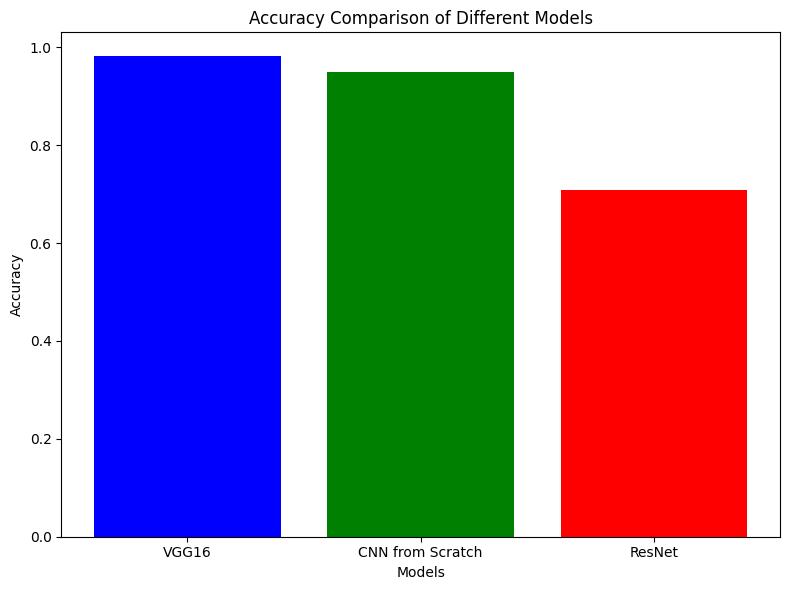

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and accuracy values
model_names = ['VGG16', 'CNN from Scratch', 'ResNet']
accuracy = [acc_vgg16, acc_cnn_scratch, acc_resnet]

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy, color=['blue', 'green', 'red'])  # Customize colors if desired

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')

# Show the plot
plt.tight_layout()
plt.show()

In [55]:
import pandas as pd

# Model names and metrics
model_names = ['VGG16', 'CNN from Scratch', 'ResNet']
accuracy = [acc_vgg16, acc_cnn_scratch, acc_resnet]
loss = [loss_vgg16, loss_cnn_scratch, loss_resnet]

# Create a dictionary with the data
data = {'Model': model_names, 'Accuracy': accuracy, 'Loss': loss}

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Display the table
print(df)

              Model  Accuracy      Loss
0             VGG16  0.981468  0.046412
1  CNN from Scratch  0.948851  0.135999
2            ResNet  0.709044  0.583820


Saving halved-rotten-orange.webp to halved-rotten-orange.webp
Saving orange-fruit-isolated-on-white.webp to orange-fruit-isolated-on-white (2).webp
Saving 5870ae2a25cdac7c580e9dcf1bbc92a1.webp to 5870ae2a25cdac7c580e9dcf1bbc92a1 (2).webp
Saving rotten-banana.webp to rotten-banana (2).webp
Saving red-apple-with-droplet.webp to red-apple-with-droplet (2).webp
Saving rotten-apple.webp to rotten-apple (2).webp
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 950ms/step


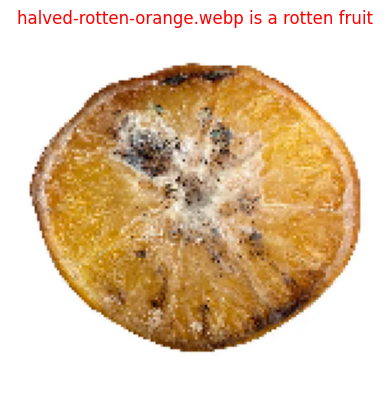

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


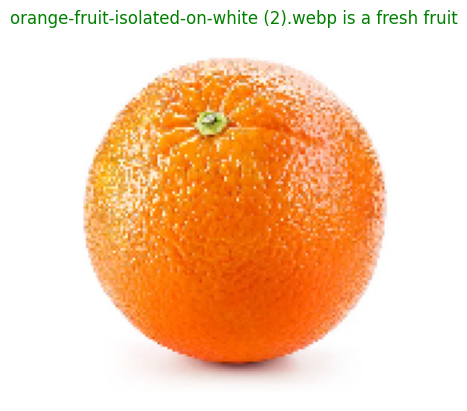

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


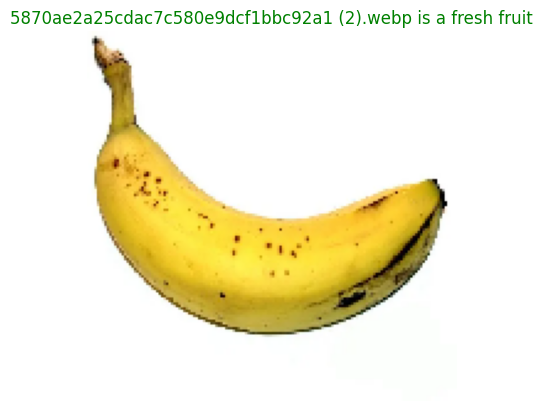

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


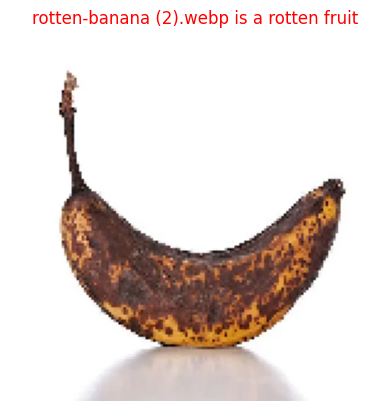

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


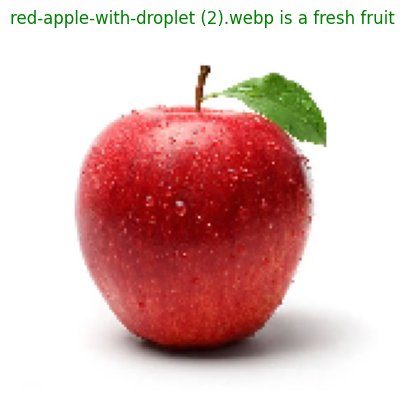

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


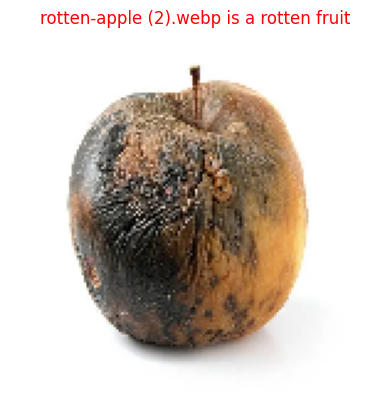

In [58]:
from keras.utils import get_file
import pathlib
import cv2
from google.colab import files
from keras.preprocessing import image
import numpy as np
import tensorflow as tf

# Load the VGG16 model from the .h5 file
model_vgg16 = tf.keras.models.load_model('/content/model.h5')  # Replace 'model.h5' with the actual filename

uploaded = files.upload()
for fn in uploaded.keys():
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model_vgg16.predict(images, batch_size=10)

  # Display the image
  plt.imshow(img)
  plt.axis('off')  # Turn off axis labels

  # Print prediction result on the image
  if classes[0]>0.5:
    plt.title(fn + " is a rotten fruit", color='red')
  else:
    plt.title(fn + " is a fresh fruit", color='green')

  plt.show()

In [ ]:
model